In [12]:
### I want to reproject an irac image of a galaxy onto a wise image (or vice versa) ###

In [13]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp # you'll probably have to install reproject: https://reproject.readthedocs.io/en/stable/installation.html#installation

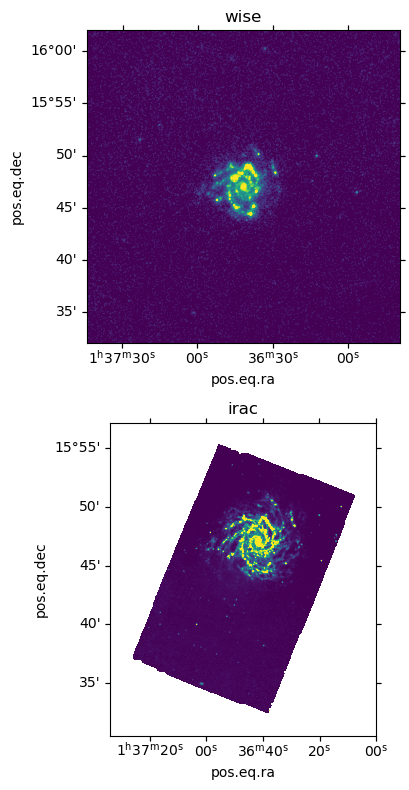

In [14]:
wise = fits.open('/Users/michaelhill/Downloads/raw_background_comps/ngc0628_w4_mjysr.fits')[0]
irac = fits.open('/Users/michaelhill/Downloads/raw_background_comps/ngc0628_irac4_gauss4.fits')[0]

wcs_wise = WCS(wise.header)
wcs_irac = WCS(irac.header)

plt.figure(figsize=(8,8))

wise_ax = plt.subplot(2,1,1, projection=wcs_wise)
wise_ax = plt.imshow(wise.data, origin='lower', vmin=-1e-4, vmax=3) # origin='lower' makes the (0,0) point the lower left corner instead of the upper right corner (it defaults to this if using WCS, but if we aren't then our images will be flipped diagonally if we don't specify origin='lower')
wise_ax = plt.title('wise')

irac_ax = plt.subplot(2,1,2, projection=wcs_irac)
irac_ax = plt.imshow(irac.data, vmin=-1e-4, vmax=3)
wisea_ax = plt.title('irac')

plt.tight_layout() # should only be executed after all subplots are made, otherwise it doesn't work (it optimizes spacing between subplots)
plt.show()

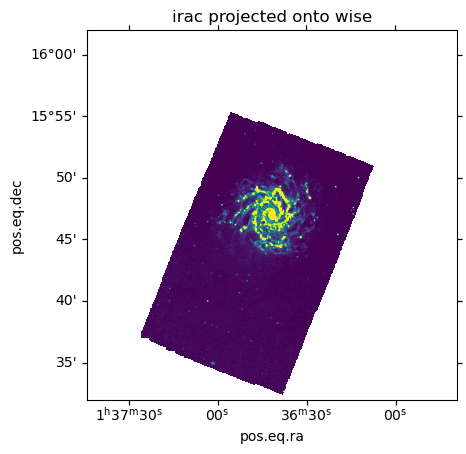

In [15]:
array = reproject_interp(irac, wise.header)[0] # need [0] because function returns the reprojected array as well as an array that provides information on the footprint of the first image in the new reprojected image plane (essentially which pixels in the new image had a corresponding pixel in the old image)
plt.subplot(projection=wcs_wise) # using wise coordinate system
plt.imshow(array, origin='lower', vmin=-1e-4, vmax=3)
plt.title('irac projected onto wise')
plt.show()

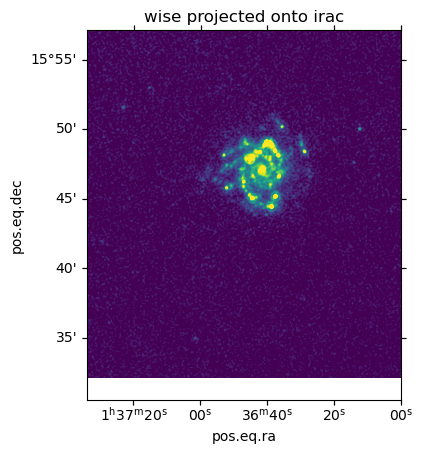

In [16]:
array = reproject_interp(wise, irac.header)[0] # projecting wise onto irac
plt.subplot(projection=wcs_irac) # using irac coordinate system
plt.imshow(array, origin='lower', vmin=-1e-4, vmax=3)
plt.title('wise projected onto irac')
plt.show()